# UMAP + Stats

Basic UMAP plotting + stats such as % number of cells per day, cluster + composition of cluster/day.

**Inputs**: 
1. `atac_metadata.tsv` with UMAP coordinates, day and cluster for scATAC-seq D2 and Multiome cells (transfered cluster).
2. Config:
    - Colours for each day (new for Multiome for D1M, D2M)
    - For each cluster, colour, description, new cluster number (same as scATAC)

In [1]:
library(ggplot2)
library(Matrix)
library(patchwork)
library(Seurat)
library(scattermore)

In [11]:
DAYS = c("D1M", "D2M", "D2")

## Loading Inputs

### MetaData
Metadata file for scATAC D2 + Multiome ATAC

In [2]:
# Metadata file for scATAC D2 + Multiome ATAC
atac_metaData = read.table("../../analysis/20220609_Multiome_SnapATAC/sessions/20220612_n13525/metadata.w.transfer.cluster.tsv", header = T, stringsAsFactor=F)
# atac_metaData = read.table("../20220609_Multiome_SnapATAC/metadata.no.harmony.tsv", header = T, stringsAsFactor=F)
rownames(atac_metaData) = paste(atac_metaData$sample, atac_metaData$barcode, sep='_')
atac_metaData$cells = rownames(atac_metaData)
dim(atac_metaData)
head(atac_metaData, 5)

[1] 13525    12

,barcode,TN,UM,PP,UQ,CM,cluster,umap1,umap2,sample,cells,transfered_cluster
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>
D1M_AAAAAAAAAAACATGCTATTAGCC,AAAAAAAAAAACATGCTATTAGCC,6736,6736,6736,6729,373,3,-0.4031222,-3.454888,D1M,D1M_AAAAAAAAAAACATGCTATTAGCC,3
D1M_AAAAAAAAAAACATGCTCACCCTC,AAAAAAAAAAACATGCTCACCCTC,28369,28369,28369,28339,2447,5,2.6643078,-3.955240,D1M,D1M_AAAAAAAAAAACATGCTCACCCTC,3
D1M_AAAAAAAAAAACATGCTTGAGAAC,AAAAAAAAAAACATGCTTGAGAAC,28635,28635,28635,28609,2201,1,-0.2071755,2.688192,D1M,D1M_AAAAAAAAAAACATGCTTGAGAAC,15
D1M_AAAAAAAAAAACCATGAACCTTGT,AAAAAAAAAAACCATGAACCTTGT,33869,33869,33869,33838,3018,5,3.1269215,-4.609105,D1M,D1M_AAAAAAAAAAACCATGAACCTTGT,3
D1M_AAAAAAAAAAACCATGAGCTTAAA,AAAAAAAAAAACCATGAGCTTAAA,18885,18885,18885,18867,1514,1,-0.1988264,1.998739,D1M,D1M_AAAAAAAAAAACCATGAGCTTAAA,15


### Day and Cluster Configs

In [244]:
day_config = read.table("../configs/multiome_day.tsv", comment.char = '', header=T)
day_config$colour = as.character(day_config$colour)
day_config$day = factor(day_config$day, levels=DAYS)
rownames(day_config) = day_config$day
day_config

,day,colour
,<fct>,<chr>
D1M,D1M,#53a548
D2M,D2M,#6E3B4E
D2,D2,#FF70A6


In [245]:
cluster_config = read.table("../configs/cluster.tsv", comment.char = '', header=T, sep='\t')
cluster_config$colour = as.character(cluster_config$colour)
cluster_config$description = as.character(cluster_config$description)

# kludge since manually removed some clusters from metaData
cluster_config = cluster_config[rownames(cluster_config) %in% atac_metaData$transfered_cluster, ]

rownames(cluster_config) = cluster_config$cluster
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
11,11,#006658,High OSK,8
13,13,#F7A6C2,Keratinocyte-like,6
15,15,#F0520A,Low OSK,7


In [281]:
(max(plot_df$umap2)-min(plot_df$umap2))/(max(plot_df$umap1)-min(plot_df$umap1))

[1] 1.495132

## Plotting

In [246]:
plot_df = data.frame(atac_metaData)
# shuffle so days don't overlap
plot_df = plot_df[sample(dim(plot_df)[1]), ]
plot_df$sample = factor(plot_df$sample, levels=DAYS)

In [247]:
# replace cluster with new cluster
plot_df$cluster = cluster_config[as.character(plot_df$transfered_cluster), "new_cluster"]

In [248]:
head(plot_df)

,barcode,TN,UM,PP,UQ,CM,cluster,umap1,umap2,sample,cells,transfered_cluster
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<fct>,<chr>,<int>
D2_CTAGCTCACAAGGCTG,CTAGCTCACAAGGCTG,4771,4771,4771,4766,26,2,-0.93294083,-4.711686,D2,D2_CTAGCTCACAAGGCTG,3
D1M_AAAAAAAAGTTTGTCGAATGACCG,AAAAAAAAGTTTGTCGAATGACCG,27039,27039,27039,27011,3395,6,-1.59960811,-4.269216,D1M,D1M_AAAAAAAAGTTTGTCGAATGACCG,13
D2M_AAAAAAAAATGGTCAACACGGTTA,AAAAAAAAATGGTCAACACGGTTA,1450,1450,1450,1447,64,2,2.58301047,-5.882720,D2M,D2M_AAAAAAAAATGGTCAACACGGTTA,3
D2_GTCGACCGAGCTCCTT,GTCGACCGAGCTCCTT,1288,1288,1288,1286,10,6,-0.03384344,1.707081,D2,D2_GTCGACCGAGCTCCTT,13
D2_ATAGGCGGATGCTGTA,ATAGGCGGATGCTGTA,2737,2737,2737,2732,106,2,2.47725167,-3.413564,D2,D2_ATAGGCGGATGCTGTA,3
D2_CACTTAGGAAGGGAGG,CACTTAGGAAGGGAGG,1098,1098,1098,1097,0,6,0.76141492,-1.148295,D2,D2_CACTTAGGAAGGGAGG,13


### Day-wise Plots

In [290]:
daywise_umap <- ggplot(plot_df) +
    geom_scattermore(pointsize=6.5, aes(x=umap1 , y=umap2, col=sample), pixels=c(1600,2500)) +
    scale_color_manual(values=day_config$colour) +
    # ggtitle("All Cells (Day)") + 
    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          legend.position = "none") +
    coord_fixed()

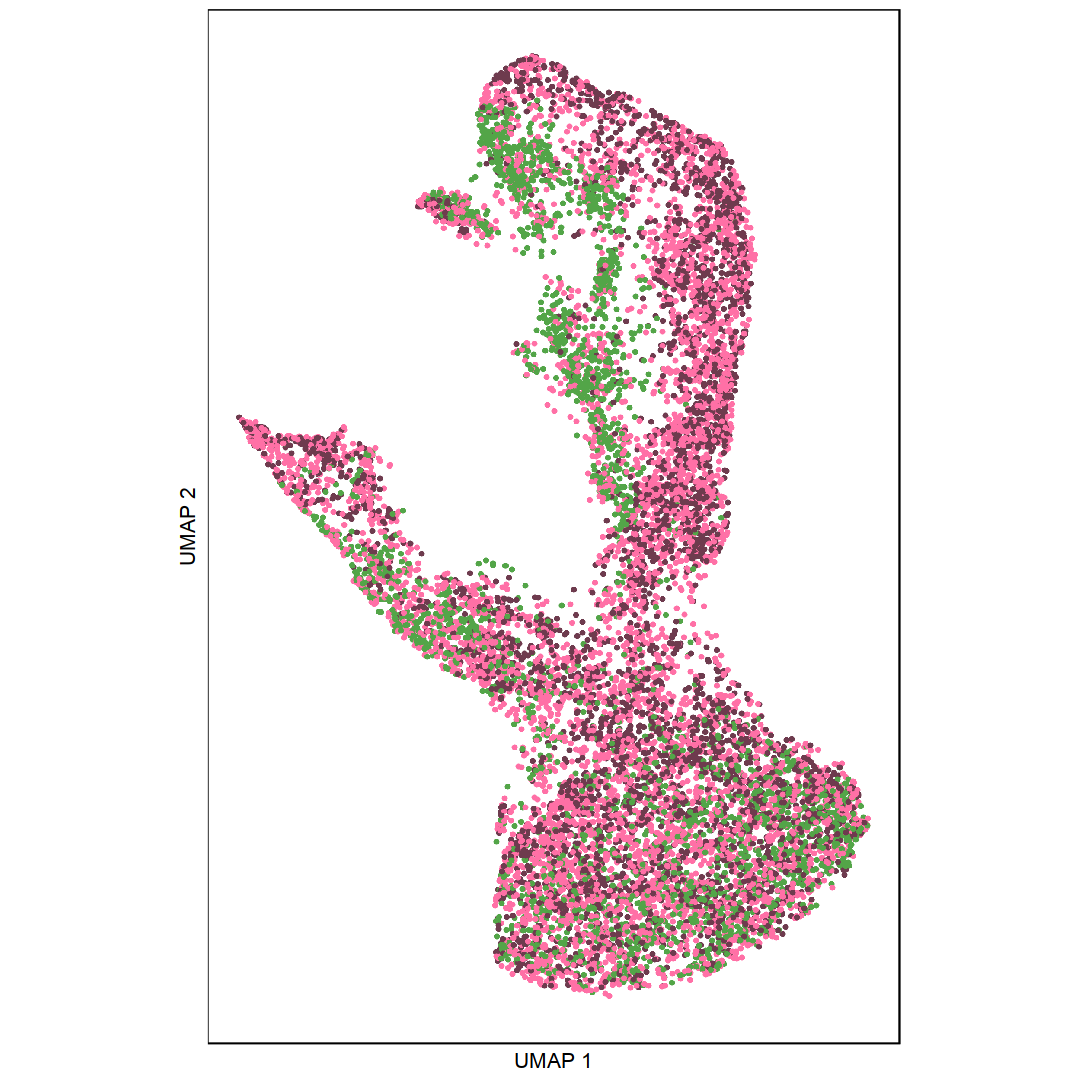

In [291]:
options(repr.plot.width = 9, repr.plot.height = 9)
daywise_umap

In [292]:
# ggsave(sprintf("pdfs/%s_daywise_umap.pdf", format(Sys.Date(), "%Y%m%d")),
#       daywise_umap, height=10, width=10)

In [293]:
# saveRDS(daywise_umap, file=sprintf("subfigs/%s_daywise_umap.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

In [294]:
daywise_counts_df = data.frame(table(atac_metaData$sample))
colnames(daywise_counts_df) = c("day", "freq")
daywise_counts_df$colour = day_config$colour
# reverse for order after flipping
daywise_counts_df$day = factor(daywise_counts_df$day, levels=rev(DAYS))
daywise_counts_df

day,freq,colour
<fct>,<int>,<chr>
D1M,3217,#53a548
D2,6147,#6E3B4E
D2M,4161,#FF70A6


In [295]:
daywise_counts <- ggplot(daywise_counts_df, aes(x = day, y = freq))+
    geom_col(aes(fill = day), width = 1, color="black") +
    scale_fill_manual(values=rev(day_config$colour)) +
    coord_flip() +
    scale_y_continuous(expand = c(0, 100), limits=c(0,7000)) +
    theme_classic() +
    scale_x_discrete(position = "top") +
    ylab("Number of \nCells/Nuclei") +
    theme(plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        axis.line=element_blank(),
        axis.title.y= element_blank(),
#         axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.major=element_line(),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title.x = element_text(size=13),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill=NA, size=0.5))

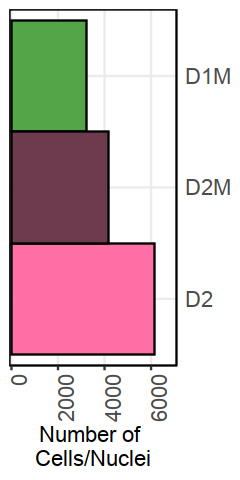

In [296]:
options(repr.plot.width = 2, repr.plot.height = 4)
daywise_counts

In [297]:
# ggsave(sprintf("pdfs/%s_daywise_cell_count.pdf", format(Sys.Date(), "%Y%m%d")),
#       daywise_counts, height=5, width=2)

In [298]:
# saveRDS(daywise_counts, file=sprintf("subfigs/%s_daywise_cell_count.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

### Cluster-wise Plot

In [299]:
order(cluster_config$new_cluster)

[1] 2 1 4 5 3

In [300]:
cluster_config

,cluster,colour,description,new_cluster
,<int>,<chr>,<chr>,<int>
2,2,#E85F6D,Fibroblast-like,3
3,3,#7C2730,Fibroblast-like,2
11,11,#006658,High OSK,8
13,13,#F7A6C2,Keratinocyte-like,6
15,15,#F0520A,Low OSK,7


In [302]:
clusterwise_umap <- ggplot(plot_df) +
#     geom_point(size=0.8, alpha=1, stroke=0, aes(x=umap1 , y=umap2, col=factor(cluster))) +
    geom_scattermore(pointsize=6.5, aes(x=umap1 , y=umap2, col=factor(cluster)), pixels=c(1600,2500)) +
    scale_color_manual(values=as.character(cluster_config$colour[order(cluster_config$new_cluster)])) +
    # cluster labels
    geom_text(data=data.frame(aggregate(plot_df[,c("umap1","umap2")], 
                                    list(plot_df$cluster), median)),
         aes(x=umap1, y=umap2, label=Group.1), fontface = "bold", size=7) +

    theme_classic() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          legend.title=element_text(size=10), 
          legend.text=element_text(size=10),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5),
          legend.position = "none") +
#     guides(colour = guide_legend(title="Day",
#                                  override.aes = list(shape=16, alpha=1, size=4))) +
    coord_fixed()

In [303]:
table(plot_df$cluster)


   2    3    6    7    8 
5264  369 2931 2339 2622 

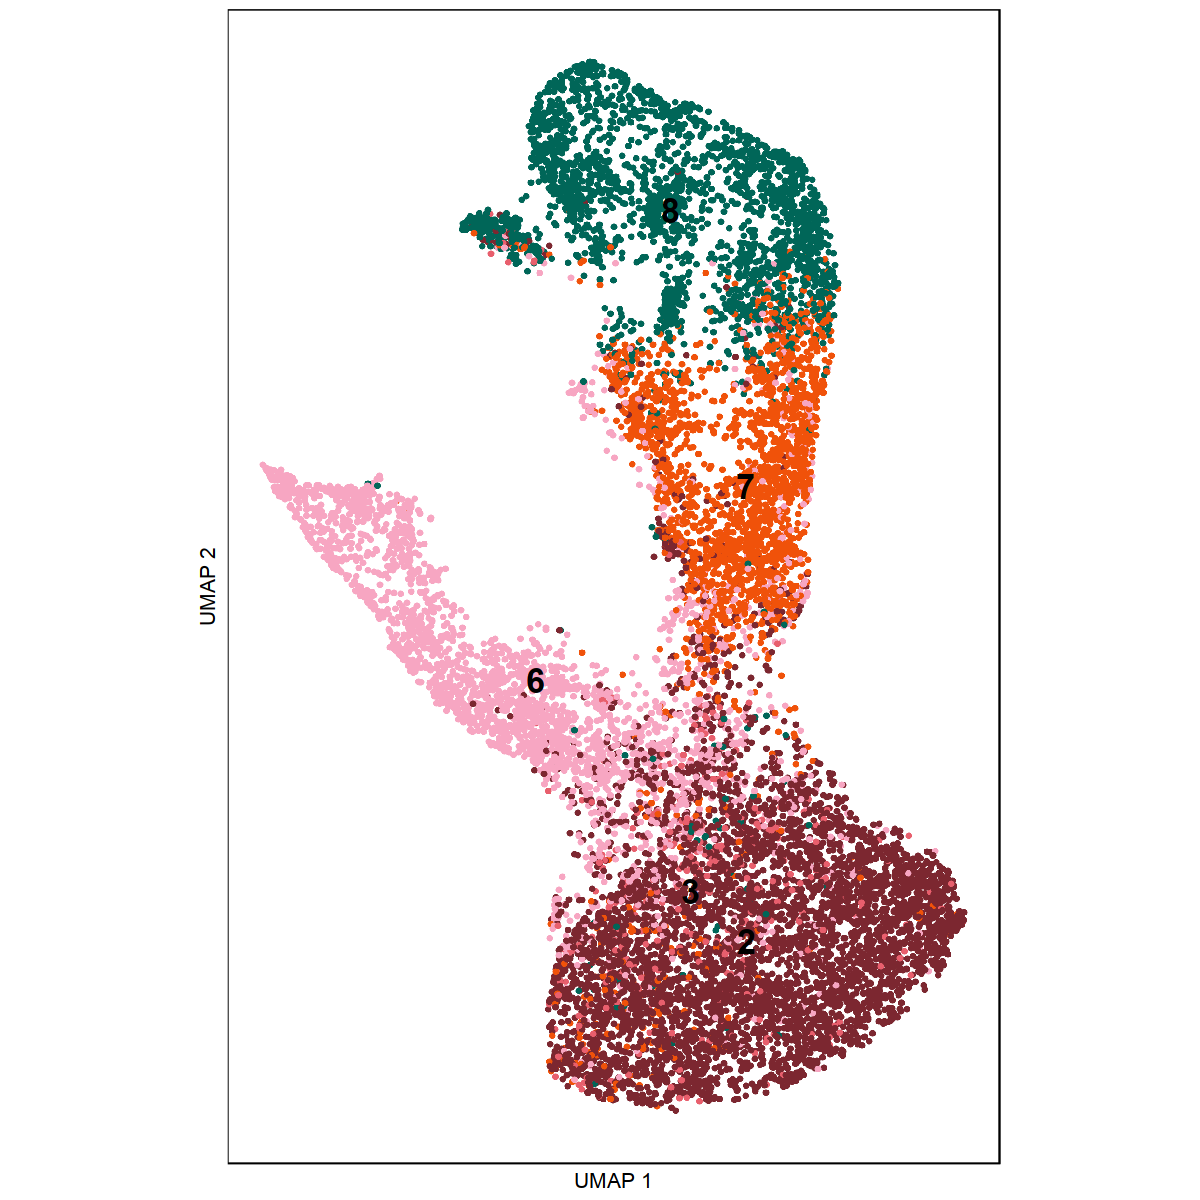

In [304]:
options(repr.plot.width = 10, repr.plot.height = 10)
clusterwise_umap

In [305]:
# ggsave(sprintf("pdfs/%s_clusterwise_umap.pdf", format(Sys.Date(), "%Y%m%d")),
#       clusterwise_umap, height=10, width=10)

In [306]:
# saveRDS(clusterwise_umap, file=sprintf("subfigs/%s_clusterwise_umap.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

In [307]:
clusterwise_counts_df = data.frame(table(plot_df[plot_df$sample!="D2",]$cluster))
colnames(clusterwise_counts_df) = c("cluster", "freq")
clusterwise_counts_df$colour = cluster_config$colour[order(cluster_config$new_cluster)]

# add description
cluster_with_description = paste(clusterwise_counts_df$cluster, 
                                 cluster_config$description[order(cluster_config$new_cluster)],
                                sep=' - ')
clusterwise_counts_df$cluster = factor(cluster_with_description, levels=cluster_with_description)

# reverse for order after flipping
clusterwise_counts_df$cluster = factor(clusterwise_counts_df$cluster, levels=rev(clusterwise_counts_df$cluster))

clusterwise_counts_df

cluster,freq,colour
<fct>,<int>,<chr>
2 - Fibroblast-like,3142,#7C2730
3 - Fibroblast-like,28,#E85F6D
6 - Keratinocyte-like,1429,#F7A6C2
7 - Low OSK,1216,#F0520A
8 - High OSK,1563,#006658


In [308]:
clusterwise_counts <- ggplot(clusterwise_counts_df, aes(x = cluster, y = freq))+
    geom_col(aes(fill = cluster), width = 1, color="black") +
    scale_fill_manual(values=rev(clusterwise_counts_df$colour)) +
    coord_flip() +
    scale_y_continuous(expand = c(0, 100), limits=c(0,3500)) +
    theme_classic() +
    scale_x_discrete(position = "top") +
    ylab("Number of Multiome\nNuclei") +
    theme(plot.title = element_text(hjust = 0.5),
        text = element_text(size=16),
        axis.line=element_blank(),
        axis.title.y= element_blank(),
#         axis.text.y=element_blank(),
        axis.ticks.y=element_blank(),
        panel.grid.major=element_line(),
        axis.text.x = element_text(angle = 90, hjust = 1),
        axis.title.x = element_text(size=13),
        legend.position = "none",
        panel.border = element_rect(colour = "black", fill=NA, size=0.5))

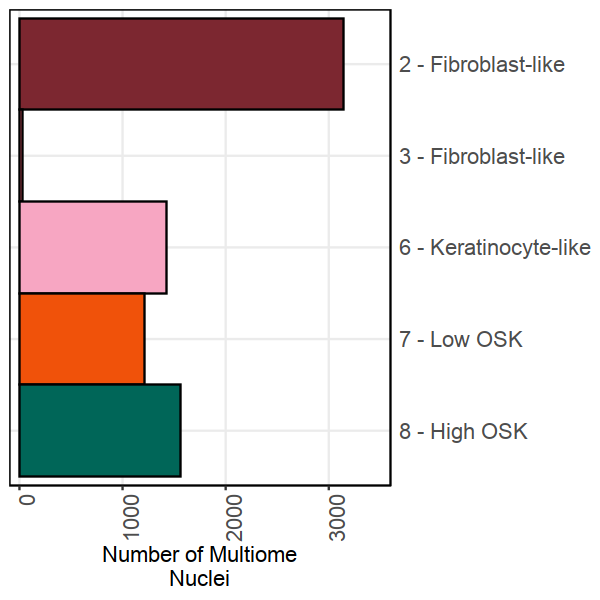

In [309]:
options(repr.plot.width = 5, repr.plot.height = 5)
clusterwise_counts

In [310]:
# ggsave(sprintf("pdfs/%s_cwise_cell_count.pdf", format(Sys.Date(), "%Y%m%d")),
#       daywise_counts, height=5, width=2)

In [311]:
# saveRDS(clusterwise_counts, file=sprintf("subfigs/%s_clusterwise_cell_count.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

### Combined 

In [312]:
daywise_counts_with_spacer = wrap_plots(plot_spacer() , daywise_counts , plot_spacer(), ncol=1, heights=c(1.5,1,1.5))

In [313]:
clusterwise_counts_with_spacer = wrap_plots(plot_spacer() , clusterwise_counts , plot_spacer(), ncol=1, heights=c(1.5,3,1.5))

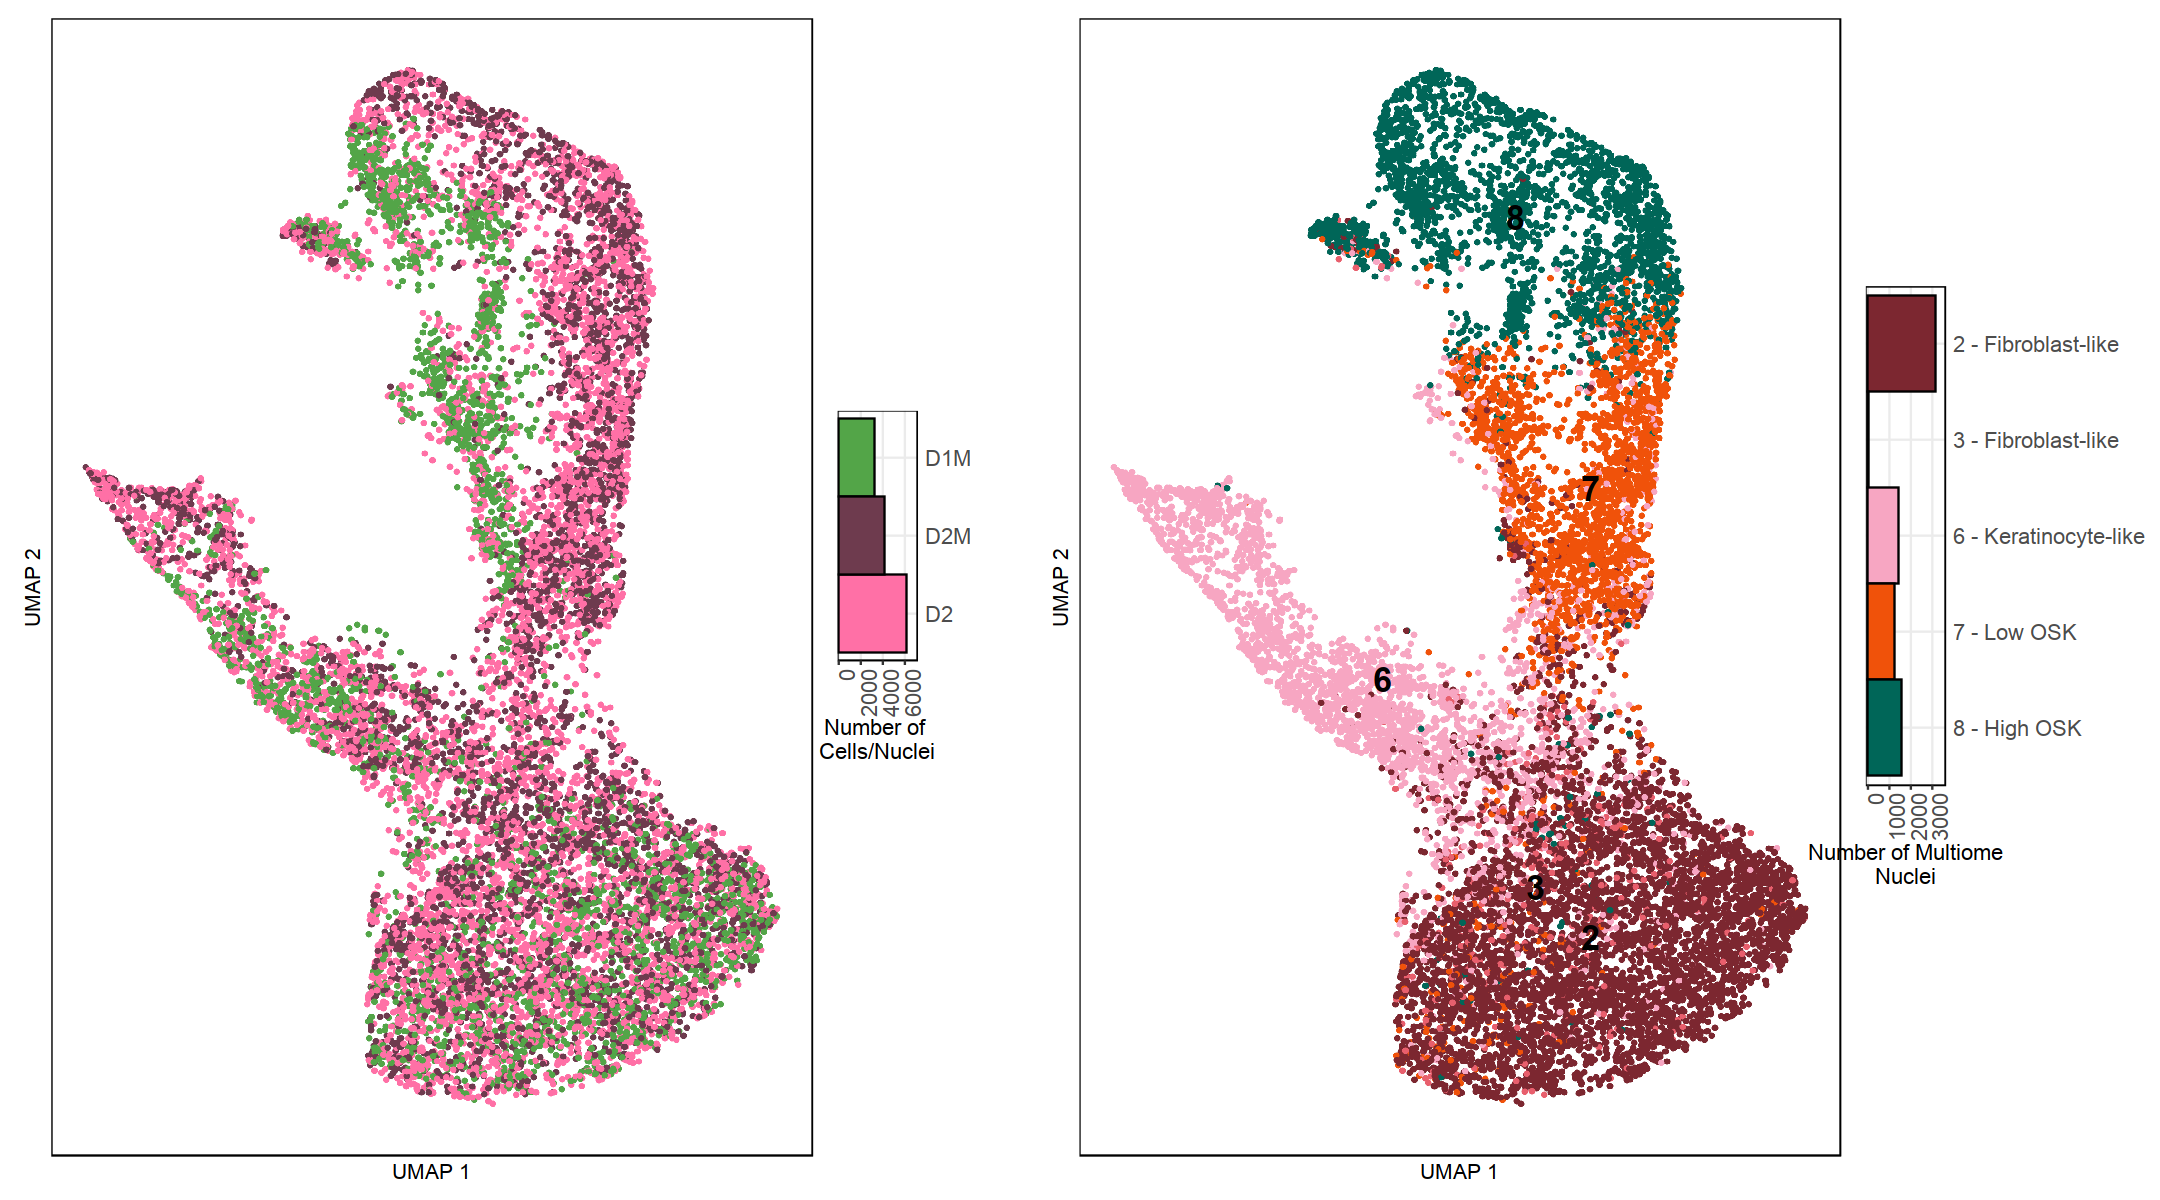

In [314]:
options(repr.plot.width = 18, repr.plot.height = 10)
combined_plot = wrap_plots(daywise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
           daywise_counts_with_spacer, 
           plot_spacer(),
           clusterwise_umap + theme(plot.margin = unit(c(0,0,0,0), "pt")), 
           clusterwise_counts_with_spacer,
           widths=c(10,1,0.5,10,1))
combined_plot

In [315]:
# save plots individually
ggsave("./subfigs/UMAP.pdf", combined_plot, width = 18, height = 10, useDingbats=F)

---

In [122]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] scattermore_0.7 Seurat_3.1.5    patchwork_1.0.0 Matrix_1.2-18  
[5] ggplot2_3.3.3  

loaded via a namespace (and not attached):
 [1] httr_1.4.1          tidyr_1.1.2         jsonlite_1.6.1     
 [4] viridisLite_0.3.0   splines_3.6.3       lsei_1.2-0         
 [7] leiden_0.3.3        ggrepel_0.8.